# Baseline CNN + TF-IDF Unigram + Word2Vec (Indonews)

## Import Library

In [223]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.layers import Input, Flatten, Dense, Conv1D, MaxPool1D, Dropout
from keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from google.colab import drive
drive.mount('/content/drive')
Path = 'drive/My Drive/TUGAS AKHIR (SKRIPSI)/TA/Data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Dataset

In [224]:
df = pd.read_csv('tweet_after_preprocessing_29k.csv', usecols = ['detokenize', 'label_1'])
df

,label_1,detokenize
0,1,cewek tolol sedih bego
1,1,goblok tolol idiot
2,1,maling goblok nama akun memelord curi meme mal...
3,1,tolol inimah tau empat ngebut
4,0,tolol tolol madrid bantai ipul anfield ngehek ...
...,...,...
29080,1,sumpah gaco amp mixue ting jadi gue sih bilang...
29081,1,anak lonte ya
29082,1,ya ya bu anak kayak lonte
29083,1,eh tolol bocah cacat situ perangkat desa langs...


In [225]:
df = df.dropna()
df

,label_1,detokenize
0,1,cewek tolol sedih bego
1,1,goblok tolol idiot
2,1,maling goblok nama akun memelord curi meme mal...
3,1,tolol inimah tau empat ngebut
4,0,tolol tolol madrid bantai ipul anfield ngehek ...
...,...,...
29080,1,sumpah gaco amp mixue ting jadi gue sih bilang...
29081,1,anak lonte ya
29082,1,ya ya bu anak kayak lonte
29083,1,eh tolol bocah cacat situ perangkat desa langs...


In [226]:
x = df['detokenize'].copy()
y = df['label_1'].copy()

## Feature Extraction (TF-IDF)

In [227]:
%%time
# define tf-idf
tf_idf = TfidfVectorizer(use_idf=True, smooth_idf=False, ngram_range=(1,1), min_df=5, max_df=0.5, max_features=1000)

# create dataframe using tf-idf
x_uni = pd.DataFrame(tf_idf.fit_transform(x).toarray(), columns=tf_idf.get_feature_names_out())
y_uni = y

x_uni

CPU times: user 586 ms, sys: 185 ms, total: 771 ms
Wall time: 791 ms


,abang,acara,ada,adab,adik,adil,admin,adu,aduh,agama,...,wasit,way,weeaboo,wifi,wkwk,woi,ya,yaman,yuk,zaman
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
29061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.515955,0.0,0.0,0.0
29062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.544035,0.0,0.0,0.0
29063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


## Feature Expansion (Word2Vec)

In [228]:
import gensim
from gensim.models import Word2Vec
from google.colab import drive
drive.mount('/content/drive')
Path = 'drive/My Drive/TUGAS AKHIR (SKRIPSI)/TA/Data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [229]:
corpus_indonews = Word2Vec.load(Path+'Corpus Berita/corpus_indonews.word2vec')

In [230]:
similar_word_news = corpus_indonews.wv.most_similar("tolol", topn = 20)
similar_word_news

[('xanana', 0.5743222832679749),
 ('icrp', 0.5493749976158142),
 ('osmar', 0.5357530117034912),
 ('rhk', 0.5304198861122131),
 ('sekretatis', 0.5196018218994141),
 ('kehutaan', 0.5188214182853699),
 ('mendeskreditkan', 0.517148494720459),
 ('sekertariat', 0.5123381614685059),
 ('menpanrb', 0.5110724568367004),
 ('samun', 0.5040553212165833),
 ('kuntowijoyo', 0.5012308359146118),
 ('hms', 0.4996301531791687),
 ('aqtharil', 0.49762097001075745),
 ('ditjenpas', 0.4957168400287628),
 ('pascareshuffle', 0.49494099617004395),
 ('jawiyyah', 0.4930900037288666),
 ('purdjianto', 0.49247297644615173),
 ('glte', 0.4918578565120697),
 ('hiz', 0.49075543880462646),
 ('cirilo', 0.4895026683807373)]

In [231]:
def feature_expansion(df, feature):
    for col in tqdm(df.columns): #loop per kolom
        try: 
            sim_word = corpus_indonews.wv.most_similar(col, topn = 5) #mencari Similarity
        except:
            sim_word = []
        if sim_word != []: #kalo similarity-nya tidak kosong
            for term in [sim_word[i][0] for i in range(len(sim_word))]: #loop per-word yang ada di Similarity
                if term in feature:
                    #untuk semua kolom yang mempunyai nilai 0 di kolom, tetapi mempunyai nilai yang bukan 0 pada kolom term
                    #nilainya diganti dengan nilai kolom term yang mempunyai nilai bukan 0
                    df[col][(df[col]==0) & (df[term]!=0)] = df[term][(df[col]==0) & (df[term]!=0)]
    return df

In [232]:
feature_ef = tf_idf.get_feature_names_out()
x_uni_fe = feature_expansion(x_uni, feature_ef)

  0%|          | 0/1000 [00:00<?, ?it/s]

## Splitting Data Ratio 90:10


In [233]:
# splitting Data to 90:10
X_train, X_test, y_train, y_test = model_selection.train_test_split(x_uni_fe, y_uni, test_size = 0.1, random_state=0)

# reshape the train and test data
X_train = np.array(X_train).reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = np.array(X_test).reshape(X_test.shape[0], 1, X_test.shape[1])

## Modelling

In [234]:
%%time
# define the CNN Model
cnn_model = tf.keras.models.Sequential() # create sequential model 
cnn_model.add(Conv1D(filters=32, kernel_size=3, padding='same',  activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (1, X_train.shape[2]))) # first cnn layer with 32 filters, conv window 3, and Leaky relu activation 
cnn_model.add(MaxPool1D(pool_size=3, padding='same')) # second cnn layer using max pooling with pool size 3
cnn_model.add(Dropout(0.2)) # add dropout layer 0.2
cnn_model.add(Flatten()) # flatten the output
cnn_model.add(Dense(units = 1, activation='sigmoid')) # dense as last layer with units=1 and activation sigmoid

# compile the model
cnn_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy']) 
cnn_model.summary()

# plot model architecture
plot_model(cnn_model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# fit the model on the training data
cnn_model_history = cnn_model.fit(X_train, y_train, epochs=5, batch_size = 64, validation_data = (X_test, y_test))

# evaluate the model and predict
score = cnn_model.evaluate(X_test, y_test, batch_size=64, verbose=0)

print()
print('Validation Accuracy:', score[1])
print('Validation Loss:', score[0])
print()

y_pred = cnn_model.predict(X_test)
y_true = y_test

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 1, 32)             96032     
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 1, 32)            0         
 g1D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 1, 32)             0         
                                                                 
 flatten_14 (Flatten)        (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 96,065
Trainable params: 96,065
Non-trainable params: 0
_________________________________________________

In [235]:
# show the classification report from the Model
classreport = classification_report(y_true, y_pred.round(), digits=4)
accscore = accuracy_score(y_true, y_pred.round())
precscore = precision_score(y_true, y_pred.round())
recscore = recall_score(y_true, y_pred.round())
f1score = f1_score(y_true, y_pred.round(), average='weighted')
print('Classification Report :')
print(classreport)

Classification Report :
              precision    recall  f1-score   support

           0     0.7858    0.7971    0.7914      1459
           1     0.7926    0.7811    0.7868      1448

    accuracy                         0.7891      2907
   macro avg     0.7892    0.7891    0.7891      2907
weighted avg     0.7892    0.7891    0.7891      2907



In [236]:
# show the accuracy, f1-Score, precision and recall score
print('Accuracy Score  :', accscore)
print('F1 Score        :', f1score)
print('Precision Score :', precscore)
print('Recall Score    :', recscore)

Accuracy Score  : 0.7891296869625043
F1 Score        : 0.7891129164134726
Precision Score : 0.7925718290119131
Recall Score    : 0.7810773480662984


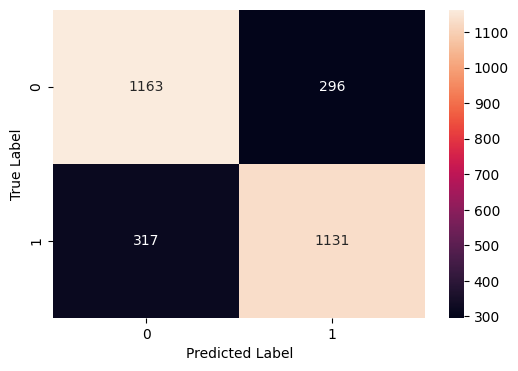

In [237]:
# show the confusion matrix 
f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(confusion_matrix(y_true, y_pred.round()), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()